### TensorFlow & Keras based NN Training

In [1]:
import numpy
import pandas
import glob
import logging
from collections import OrderedDict as od
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### Load Preprocessed Feature sets

In [3]:
data=od()
for filename in glob.glob('../Data/Features/*'):
    key=filename.split('/')[-1].split('_')[0]
    print(key)
    data[key]=pandas.read_csv(filename).reset_index().dropna()

201711092033
201711182141
201711091951
201711161638


In [4]:
def splitX_Y(df):
    X=df[[u'lastAccelerometerValues[0]_mean_D',
       u'lastAccelerometerValues[1]_mean_D', u'lastAccelerometerValues[2]_mean_D',
       u'lastAccelerometerValues[0]_var_D', u'lastAccelerometerValues[1]_var_D',
       u'lastAccelerometerValues[2]_var_D', u'lastAccelerometerValues[0]_skew_D',
       u'lastAccelerometerValues[1]_skew_D', u'lastAccelerometerValues[2]_skew_D',
       u'lastAccelerometerValues[0]_kurtosis_D',
       u'lastAccelerometerValues[1]_kurtosis_D',
       u'lastAccelerometerValues[2]_kurtosis_D', u'lastGyroscopeValues[0]_mean_D',
       u'lastGyroscopeValues[1]_mean_D', u'lastGyroscopeValues[2]_mean_D',
       u'lastGyroscopeValues[0]_var_D', u'lastGyroscopeValues[1]_var_D',
       u'lastGyroscopeValues[2]_var_D', u'lastGyroscopeValues[0]_skew_D',
       u'lastGyroscopeValues[1]_skew_D', u'lastGyroscopeValues[2]_skew_D',
       u'lastGyroscopeValues[0]_kurtosis_D', u'lastGyroscopeValues[1]_kurtosis_D',
       u'lastGyroscopeValues[2]_kurtosis_D', u'lastMagnetometerValues[0]_mean_D',
       u'lastMagnetometerValues[1]_mean_D', u'lastMagnetometerValues[2]_mean_D',
       u'lastMagnetometerValues[0]_var_D', u'lastMagnetometerValues[1]_var_D',
       u'lastMagnetometerValues[2]_var_D', u'lastMagnetometerValues[0]_skew_D',
       u'lastMagnetometerValues[1]_skew_D', u'lastMagnetometerValues[2]_skew_D',
       u'lastMagnetometerValues[0]_kurtosis_D',
       u'lastMagnetometerValues[1]_kurtosis_D',
       u'lastMagnetometerValues[2]_kurtosis_D',
         u'lastAccelerometerValues[0]_mean_U',
       u'lastAccelerometerValues[1]_mean_U', u'lastAccelerometerValues[2]_mean_U',
       u'lastAccelerometerValues[0]_var_U', u'lastAccelerometerValues[1]_var_U',
       u'lastAccelerometerValues[2]_var_U', u'lastAccelerometerValues[0]_skew_U',
       u'lastAccelerometerValues[1]_skew_U', u'lastAccelerometerValues[2]_skew_U',
       u'lastAccelerometerValues[0]_kurtosis_U',
       u'lastAccelerometerValues[1]_kurtosis_U',
       u'lastAccelerometerValues[2]_kurtosis_U', u'lastGyroscopeValues[0]_mean_U',
       u'lastGyroscopeValues[1]_mean_U', u'lastGyroscopeValues[2]_mean_U',
       u'lastGyroscopeValues[0]_var_U', u'lastGyroscopeValues[1]_var_U',
       u'lastGyroscopeValues[2]_var_U', u'lastGyroscopeValues[0]_skew_U',
       u'lastGyroscopeValues[1]_skew_U', u'lastGyroscopeValues[2]_skew_U',
       u'lastGyroscopeValues[0]_kurtosis_U', u'lastGyroscopeValues[1]_kurtosis_U',
       u'lastGyroscopeValues[2]_kurtosis_U', u'lastMagnetometerValues[0]_mean_U',
       u'lastMagnetometerValues[1]_mean_U', u'lastMagnetometerValues[2]_mean_U',
       u'lastMagnetometerValues[0]_var_U', u'lastMagnetometerValues[1]_var_U',
       u'lastMagnetometerValues[2]_var_U', u'lastMagnetometerValues[0]_skew_U',
       u'lastMagnetometerValues[1]_skew_U', u'lastMagnetometerValues[2]_skew_U',
       u'lastMagnetometerValues[0]_kurtosis_U',
       u'lastMagnetometerValues[1]_kurtosis_U',
       u'lastMagnetometerValues[2]_kurtosis_U']]
    cols=['Acc_X_mean_D', 'Acc_Y_mean_D', 'Acc_Z_mean_D',
          'Acc_X_var_D', 'Acc_Y_var_D','Acc_Z_var_D', 
          'Acc_X_skew_D','Acc_Y_skew_D', 'Acc_Z_skew_D',
          'Acc_X_kurt_D','Acc_Y_kurt_D','Acc_Z_kurt_D',
          'Gyr_X_mean_D','Gyr_Y_mean_D', 'Gyr_Z_mean_D',
          'Gyr_X_var_D', 'Gyr_Y_var_D','Gyr_Z_var_D',
          'Gyr_X_skew_D','Gyr_Y_skew_D', 'Gyr_Z_skew_D',
          'Gyr_X_kurt_D', 'Gyr_Y_kurt_D','Gyr_Z_kurt_D',
          'Mag_X_mean_D', 'Mag_Y_mean_D', 'Mag_Z_mean_D',
          'Mag_X_var_D', 'Mag_Y_var_D','Mag_Z_var_D',
          'Mag_X_skew_D', 'Mag_Y_skew_D', 'Mag_Z_skew_D',
          'Mag_X_kurt_D', 'Mag_Y_kurt_D','Mag_Z_kurt_D',
          'Acc_X_mean_U','Acc_Y_mean_U', 'Acc_Z_mean',
          'Acc_X_var_U', 'Acc_Y_var','Acc_Z_var_U',
          'Acc_X_skew', 'Acc_Y_skew_U', 'Acc_Z_skew',
          'Acc_X_kurt_U', 'Acc_Y_kurt_U', 'Acc_Z_kurt_U',
          'Gyr_X_mean', 'Gyr_Y_mean_U', 'Gyr_Z_mean',
          'Gyr_X_var_U', 'Gyr_Y_var', 'Gyr_Z_var_U',
          'Gyr_X_skew', 'Gyr_Y_skew_U', 'Gyr_Z_skew',
          'Gyr_X_kurt_U', 'Gyr_Y_kurt', 'Gyr_Z_kurt_U',
          'Mag_X_mean', 'Mag_Y_mean_U', 'Mag_Z_mean',
          'Mag_X_var_U', 'Mag_Y_var', 'Mag_Z_var_U',
          'Mag_X_skew', 'Mag_Y_skew_U', 'Mag_Z_skew',
          'Mag_X_kurt_U', 'Mag_Y_kurt', 'Mag_Z_kurt']
    X.columns=cols
    Y=df[['target']]
    return X, Y

#### Split Features & Labels

In [5]:
X=pandas.DataFrame()
Y=pandas.DataFrame()
for key in data.keys():
    x,y=splitX_Y(data[key])
    X=X.append(x)
    Y=Y.append(y)
X=X.reset_index().drop(['index'],axis=1)
Y=Y.reset_index().drop(['index'],axis=1)

In [7]:
for key in data.keys():
    print data[key].shape

(107, 75)
(348, 75)
(141, 75)
(266, 75)


In [8]:
Y0=Y.applymap(lambda x: x//72)

In [9]:
Y1=Y.applymap(lambda x: x//36)

In [10]:
Y2=Y.applymap(lambda x: x//18)

In [11]:
Y3=Y.applymap(lambda x: x//9)

In [12]:
# encode class values as integers
def encoded(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    return encoded_Y

In [13]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y0 = np_utils.to_categorical(encoded(Y0))
dummy_y1 = np_utils.to_categorical(encoded(Y1))
dummy_y2 = np_utils.to_categorical(encoded(Y2))
dummy_y3 = np_utils.to_categorical(encoded(Y3))

/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model 0
36 inputs -> [40 hidden nodes] -> 2 outputs

In [14]:
# define baseline model
def model0():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=72, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model 1
36 inputs -> [40 hidden nodes] -> 4 outputs

In [15]:
# define baseline model
def model1():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=72, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model 2
36 inputs -> [40 hidden nodes] -> 8 outputs

In [16]:
# define baseline model
def model2():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=72, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Model 3
36 inputs -> [40 hidden nodes] -> 16 outputs

In [17]:
# define baseline model
def model3():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=72, activation='relu'))
    model.add(Dense(16, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
estimator0 = KerasClassifier(build_fn=model0, epochs=200, batch_size=5, verbose=0)
estimator1 = KerasClassifier(build_fn=model1, epochs=200, batch_size=5, verbose=0)
estimator2 = KerasClassifier(build_fn=model2, epochs=200, batch_size=5, verbose=0)
estimator3 = KerasClassifier(build_fn=model3, epochs=200, batch_size=5, verbose=0)

In [19]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [20]:
%%time
results0 = cross_val_score(estimator0, X.values, dummy_y0, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results0.mean()*100, results0.std()*100))

Baseline: 88.97% (9.46%)
CPU times: user 10min, sys: 9.4 s, total: 10min 9s
Wall time: 8min 1s


In [ ]:
%%time
results0 = cross_val_score(estimator0, X.values, dummy_y0, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results0.mean()*100, results0.std()*100))

Baseline: 93.62% (2.22%)
CPU times: user 10min 54s, sys: 9.77 s, total: 11min 3s
Wall time: 8min 56s


In [ ]:
%%time
results1 = cross_val_score(estimator1, X.values, dummy_y1, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

In [ ]:
%%time
results2 = cross_val_score(estimator2, X.values, dummy_y2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

In [ ]:
%%time
results3 = cross_val_score(estimator3, X.values, dummy_y3, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

Baseline: 32.48% (4.74%)
CPU times: user 13min 4s, sys: 9.96 s, total: 13min 14s
Wall time: 10min 49s


In [49]:
%%time
hist0=estimator0.fit(X.values,dummy_y0, validation_split=0.33, epochs=250, batch_size=10, verbose=0)

CPU times: user 34.6 s, sys: 470 ms, total: 35.1 s
Wall time: 27.9 s


In [50]:
%%time
hist1=estimator1.fit(X.values,dummy_y1, validation_split=0.33, epochs=250, batch_size=10, verbose=0)

CPU times: user 37 s, sys: 626 ms, total: 37.6 s
Wall time: 30.1 s


In [51]:
%%time
hist2=estimator2.fit(X.values,dummy_y2, validation_split=0.33, epochs=250, batch_size=10, verbose=0)

CPU times: user 37.3 s, sys: 549 ms, total: 37.9 s
Wall time: 29.9 s


In [53]:
%%time
hist3=estimator3.fit(X.values,dummy_y3, validation_split=0.33, epochs=250, batch_size=10, verbose=0)

CPU times: user 39.2 s, sys: 510 ms, total: 39.7 s
Wall time: 31 s


In [81]:
import matplotlib.pyplot as plt
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

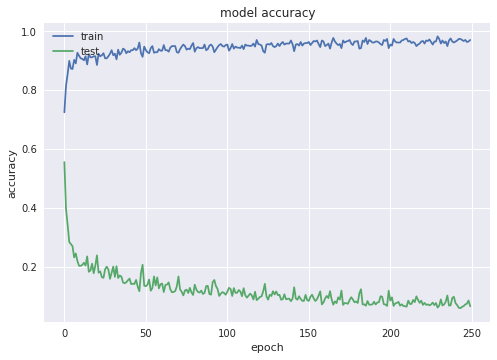

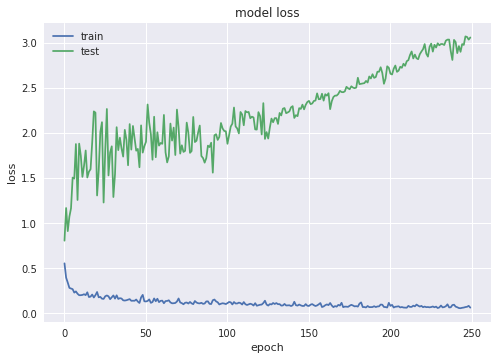

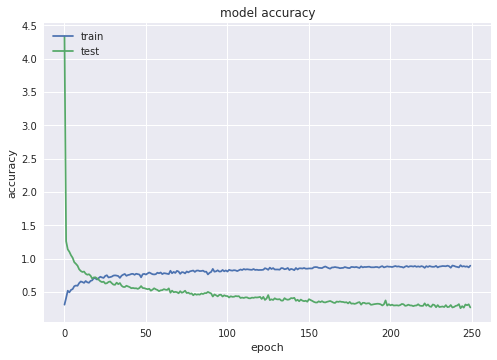

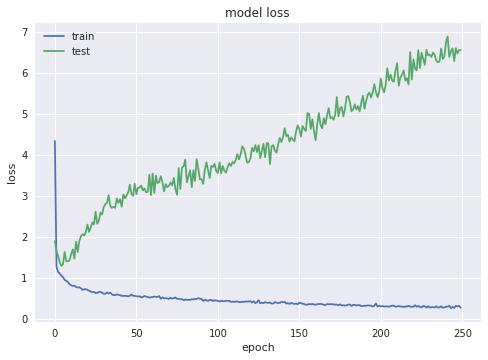

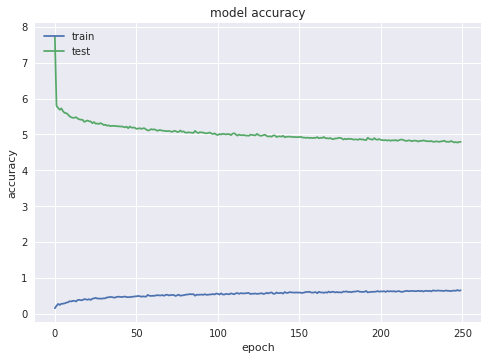

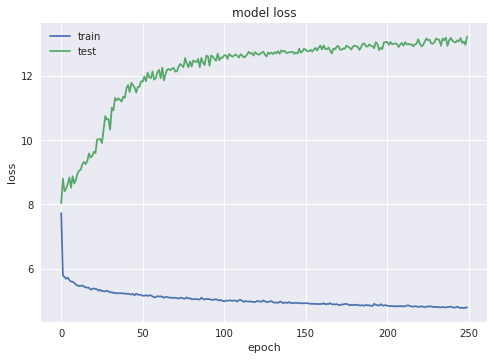

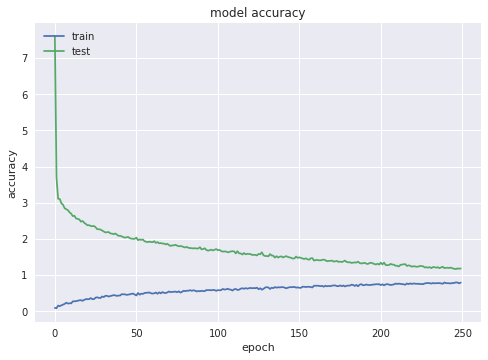

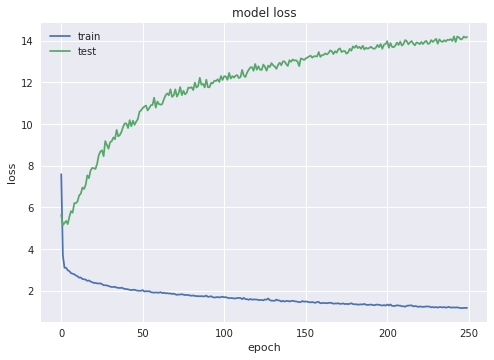

In [80]:
plotHistory(hist0)
plotHistory(hist1)
plotHistory(hist2)
plotHistory(hist3)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
def plotCorr(x):
    # Compute the correlation matrix
    corr = x.corr()

    # Generate a mask for the upper triangle
    mask = numpy.zeros_like(corr, dtype=numpy.bool)
    mask[numpy.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

/usr/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


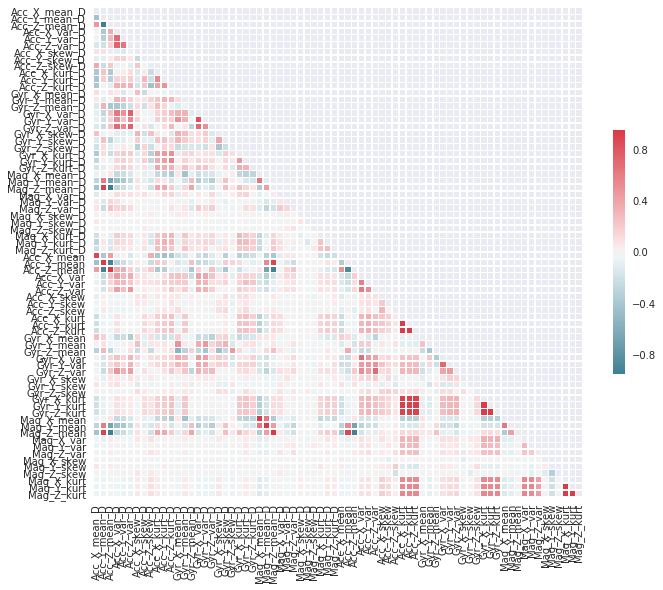

In [100]:
plotCorr(X)

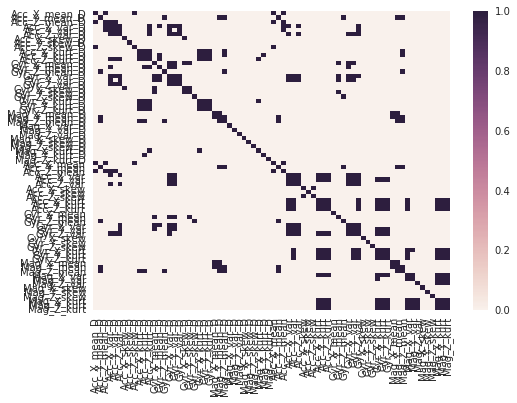

In [105]:
sns.heatmap(corr>0.3)
plt.show()

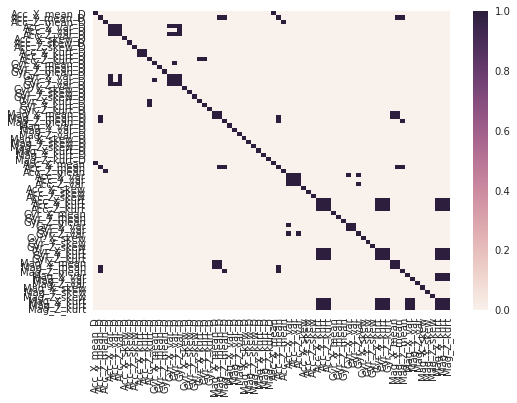

In [106]:
sns.heatmap(corr>0.5)
plt.show()

In [64]:
set(Y1.target)

{0.0, 1.0, 2.0, 3.0}

In [108]:
X.head()

,Acc_X_mean_D,Acc_Y_mean_D,Acc_Z_mean_D,Acc_X_var_D,Acc_Y_var_D,Acc_Z_var_D,Acc_X_skew_D,Acc_Y_skew_D,Acc_Z_skew_D,Acc_X_kurt_D,...,Mag_Z_mean,Mag_X_var,Mag_Y_var,Mag_Z_var,Mag_X_skew,Mag_Y_skew,Mag_Z_skew,Mag_X_kurt,Mag_Y_kurt,Mag_Z_kurt
0,0.598775,8.175725,5.181346,0.003885,0.002872,0.134027,-0.706908,0.639990,-0.705996,-1.500000,...,-15.101624,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-3.0
1,0.395782,8.378723,4.943654,0.003987,0.000717,0.016536,-0.141237,0.581008,-0.545424,-1.500000,...,-14.501953,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-3.0
2,0.430084,8.427770,5.102778,0.000506,0.001241,0.002946,0.424470,0.470419,-0.595111,-1.500000,...,-12.933350,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-3.0
3,0.489899,8.398656,5.032191,0.000671,0.001398,0.002738,0.652012,-0.496261,-0.524449,-1.500000,...,-13.775635,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-3.0
4,0.573158,8.393074,5.078251,0.000455,0.001484,0.003737,0.343030,-0.819202,1.154036,-1.117516,...,-14.614868,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,-3.0,-3.0


In [65]:
set(Y2.target)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

In [66]:
set(Y3.target)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0}

In [104]:
corr=X.corr()

In [95]:
sns.heatmap(corr<-0.3)

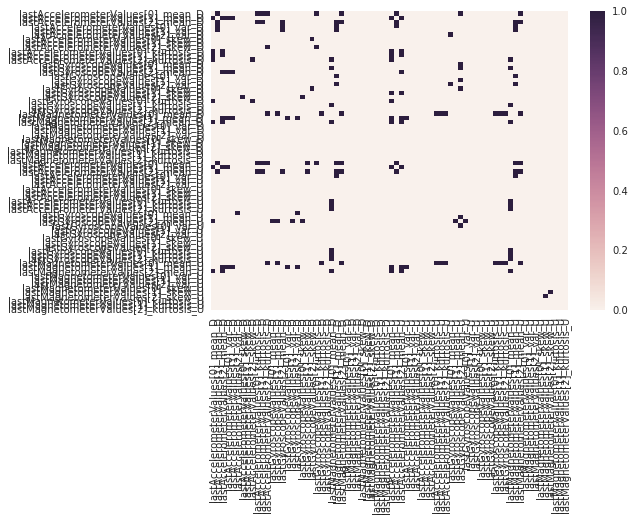

In [96]:
plt.show()